In [3]:
#%tensorflow_version 2.x
#from __future__ import absolute_import, division, print_function, unicode_literals;


UsageError: Line magic function `%tensorflow_version` not found.


In [522]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import save_model
from matplotlib import pyplot as plt
import seaborn as sns
import csv as csv
import cv2


# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

print ('imported modules');

TOTAL_WIDTH = 288.00;
TOTAL_HEIGHT = 190.00;
TOTAL_PIXELS = TOTAL_WIDTH * TOTAL_HEIGHT;
TOTAL_COLORS = 16777216.00;

print (TOTAL_PIXELS);
print (TOTAL_COLORS);


imported modules
54720.0
16777216.0


In [101]:
train_df = pd.read_csv('training.csv');
test_df = pd.read_csv('test.csv');




In [102]:
train_df.head()

,Tile0,Tile1,Tile2,Tile3,Tile4,Tile5,Tile6,Tile7,Tile8,Tile9,...,Tile333,Tile334,Tile335,Tile336,Tile337,Tile338,Tile339,Tile340,Tile341,Center
0,655616,13195527,14243584,985857,12933124,13063941,13654016,8211763,13850624,14572800,...,7970495,4548489,6194598,5997219,6063012,5602461,4879767,7312563,7904700,46548
1,655616,1116674,14111748,985857,13981440,1182467,13850624,8211763,13850624,5199707,...,7707323,6391463,5076115,5470875,7180979,6128550,4813974,4747920,7312563,45975
2,13588231,0,1508871,11640213,524288,13326343,5138051,655616,655360,656384,...,6590385,6985136,6654640,8233919,5995933,8298435,8298688,7773630,6720426,45394
3,13588231,0,1508871,11640213,524288,13326343,5138051,655616,655360,656384,...,8036286,6260906,6654640,8233919,5995933,8298435,8298688,7773630,6720426,45110
4,13588231,0,1508871,11640213,524288,13326343,5138051,655616,655360,656384,...,6128803,2773869,6523824,8233919,5995933,8298435,8298688,7773630,6720426,44824


In [103]:
test_df.head()    

,Tile0,Tile1,Tile2,Tile3,Tile4,Tile5,Tile6,Tile7,Tile8,Tile9,...,Tile333,Tile334,Tile335,Tile336,Tile337,Tile338,Tile339,Tile340,Tile341,Center
0,3893654,4607342,5844480,9080717,7879975,6104576,6366209,6432256,6301184,7552035,...,1845285,4087637,2508826,2904332,2904077,3494925,3298569,2903816,6388879,35470
1,14112512,13850624,919818,524288,13916160,13850624,14113536,655616,524288,656384,...,1652567,4945815,3105154,5339804,3828618,6391977,4419730,4615566,4945299,41875
2,262144,262144,262144,393216,12209408,13261066,13327361,1050886,12471552,590336,...,6260129,8497091,6524333,8167872,7049905,7313077,7575989,7312817,7247024,38990
3,14244097,14113792,655360,524288,13589760,13981186,262144,7751744,14112512,590592,...,3756406,5075862,3753779,5405852,139075,2574697,6062498,5207448,5207448,40252
4,14112512,13981696,14244608,13915393,13981440,13981440,13588736,786432,13915904,14112002,...,4155785,1,4419216,4812690,270144,205121,6588842,5076887,5010839,14335


In [104]:
train_df.dtypes

Tile0      int64
Tile1      int64
Tile2      int64
Tile3      int64
Tile4      int64
           ...  
Tile338    int64
Tile339    int64
Tile340    int64
Tile341    int64
Center     int64
Length: 343, dtype: object

In [105]:
train_df = train_df.astype(float)
test_df =  test_df.astype(float);

print (train_df['Center'][0])
print (test_df['Center'][0])

46548.0
35470.0


In [106]:
train_df.dtypes
train_df['Center'] = train_df['Center'] / TOTAL_PIXELS;

test_df.dtypes
test_df['Center'] = test_df['Center'] / TOTAL_PIXELS;

In [107]:
print (train_df['Center'][0])
print (test_df['Center'][0])

0.8506578947368421
0.6482090643274854


In [108]:
originalPoint = train_df['Center'][0] * TOTAL_PIXELS;
print (originalPoint)

originalPoint = test_df['Center'][0] * TOTAL_PIXELS;
print (originalPoint)


46548.0
35470.0


In [109]:
for i in range(0,342):
    colName = 'Tile'+str(i);
    train_df[colName] = train_df[colName] / TOTAL_COLORS;
    test_df[colName] = test_df[colName] / TOTAL_COLORS;

In [110]:
print (train_df['Tile0'][0])
print (test_df['Tile0'][0])

0.0390777587890625
0.2320798635482788


In [111]:
originalTile = train_df['Tile0'][0] * TOTAL_COLORS;
print (originalTile);

originalTile = test_df['Tile0'][0] * TOTAL_COLORS;
print (originalTile);


655616.0
3893654.0


In [112]:
train_df.head()

,Tile0,Tile1,Tile2,Tile3,Tile4,Tile5,Tile6,Tile7,Tile8,Tile9,...,Tile333,Tile334,Tile335,Tile336,Tile337,Tile338,Tile339,Tile340,Tile341,Center
0,0.0,0.8,0.8,0.1,0.8,0.8,0.8,0.5,0.8,0.9,...,0.5,0.3,0.4,0.4,0.4,0.3,0.3,0.4,0.5,0.9
1,0.0,0.1,0.8,0.1,0.8,0.1,0.8,0.5,0.8,0.3,...,0.5,0.4,0.3,0.3,0.4,0.4,0.3,0.3,0.4,0.8
2,0.8,0.0,0.1,0.7,0.0,0.8,0.3,0.0,0.0,0.0,...,0.4,0.4,0.4,0.5,0.4,0.5,0.5,0.5,0.4,0.8
3,0.8,0.0,0.1,0.7,0.0,0.8,0.3,0.0,0.0,0.0,...,0.5,0.4,0.4,0.5,0.4,0.5,0.5,0.5,0.4,0.8
4,0.8,0.0,0.1,0.7,0.0,0.8,0.3,0.0,0.0,0.0,...,0.4,0.2,0.4,0.5,0.4,0.5,0.5,0.5,0.4,0.8


In [113]:
test_df.head()

,Tile0,Tile1,Tile2,Tile3,Tile4,Tile5,Tile6,Tile7,Tile8,Tile9,...,Tile333,Tile334,Tile335,Tile336,Tile337,Tile338,Tile339,Tile340,Tile341,Center
0,0.2,0.3,0.3,0.5,0.5,0.4,0.4,0.4,0.4,0.5,...,0.1,0.2,0.1,0.2,0.2,0.2,0.2,0.2,0.4,0.6
1,0.8,0.8,0.1,0.0,0.8,0.8,0.8,0.0,0.0,0.0,...,0.1,0.3,0.2,0.3,0.2,0.4,0.3,0.3,0.3,0.8
2,0.0,0.0,0.0,0.0,0.7,0.8,0.8,0.1,0.7,0.0,...,0.4,0.5,0.4,0.5,0.4,0.4,0.5,0.4,0.4,0.7
3,0.8,0.8,0.0,0.0,0.8,0.8,0.0,0.5,0.8,0.0,...,0.2,0.3,0.2,0.3,0.0,0.2,0.4,0.3,0.3,0.7
4,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.0,0.8,0.8,...,0.2,0.0,0.3,0.3,0.0,0.0,0.4,0.3,0.3,0.3


In [114]:
print ('data norm finished');

data norm finished


In [115]:
train_df = train_df.reindex(np.random.permutation(train_df.index)); # shuffle the examples


In [116]:
train_df.head()

,Tile0,Tile1,Tile2,Tile3,Tile4,Tile5,Tile6,Tile7,Tile8,Tile9,...,Tile333,Tile334,Tile335,Tile336,Tile337,Tile338,Tile339,Tile340,Tile341,Center
928,0.4,0.4,0.4,0.4,0.5,0.4,0.4,0.4,0.4,0.4,...,0.2,0.2,0.1,0.1,0.0,0.1,0.1,0.1,0.1,0.6
561,0.1,0.5,0.4,0.5,0.3,0.3,0.4,0.3,0.3,0.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4
595,0.8,0.7,0.0,0.0,0.1,0.8,0.3,0.0,0.0,0.0,...,0.4,0.4,0.4,0.5,0.4,0.5,0.4,0.5,0.4,0.7
926,0.4,0.4,0.4,0.4,0.5,0.4,0.5,0.4,0.4,0.5,...,0.2,0.2,0.1,0.2,0.4,0.1,0.1,0.1,0.1,0.6
931,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,...,0.1,0.1,0.0,0.2,0.0,0.1,0.0,0.1,0.1,0.7


In [117]:
originalTile = train_df['Tile6'][344] * TOTAL_COLORS;
print (originalTile);

originalTile = test_df['Tile0'][0] * TOTAL_COLORS;
print (originalTile);

originalTile = train_df['Center'][344] * TOTAL_COLORS;
print (originalTile);



13653505.0
3893654.0
9154191.120467836


In [118]:
print (train_df['Tile6'][344]);

0.8138123154640198


In [119]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('Center')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [120]:
train_ds = df_to_dataset(train_df,True,32);
test_ds = df_to_dataset(test_df,False,32);


In [121]:
for feature_batch, label_batch in train_ds.take(1):
  print('Every feature:', list(feature_batch.keys()))
  print('A batch of Tile0:', feature_batch['Tile0'])
  print('A batch of targets:', label_batch )

Every feature: ['Tile0', 'Tile1', 'Tile2', 'Tile3', 'Tile4', 'Tile5', 'Tile6', 'Tile7', 'Tile8', 'Tile9', 'Tile10', 'Tile11', 'Tile12', 'Tile13', 'Tile14', 'Tile15', 'Tile16', 'Tile17', 'Tile18', 'Tile19', 'Tile20', 'Tile21', 'Tile22', 'Tile23', 'Tile24', 'Tile25', 'Tile26', 'Tile27', 'Tile28', 'Tile29', 'Tile30', 'Tile31', 'Tile32', 'Tile33', 'Tile34', 'Tile35', 'Tile36', 'Tile37', 'Tile38', 'Tile39', 'Tile40', 'Tile41', 'Tile42', 'Tile43', 'Tile44', 'Tile45', 'Tile46', 'Tile47', 'Tile48', 'Tile49', 'Tile50', 'Tile51', 'Tile52', 'Tile53', 'Tile54', 'Tile55', 'Tile56', 'Tile57', 'Tile58', 'Tile59', 'Tile60', 'Tile61', 'Tile62', 'Tile63', 'Tile64', 'Tile65', 'Tile66', 'Tile67', 'Tile68', 'Tile69', 'Tile70', 'Tile71', 'Tile72', 'Tile73', 'Tile74', 'Tile75', 'Tile76', 'Tile77', 'Tile78', 'Tile79', 'Tile80', 'Tile81', 'Tile82', 'Tile83', 'Tile84', 'Tile85', 'Tile86', 'Tile87', 'Tile88', 'Tile89', 'Tile90', 'Tile91', 'Tile92', 'Tile93', 'Tile94', 'Tile95', 'Tile96', 'Tile97', 'Tile98', 'Til

In [165]:
example_batch = next(iter(train_ds))[0]


def demo(feature_column):
  feature_layer = layers.DenseFeatures(feature_column)
  print(feature_layer(example_batch).numpy())

In [166]:
feature_columns = []


In [167]:
for i in range(0,342):
       feature_columns.append(tf.feature_column.numeric_column("Tile"+str(i),shape=(1,),default_value=None,dtype=tf.dtypes.float64,normalizer_fn=None));
        
my_feature_layer = tf.keras.layers.DenseFeatures(feature_columns);


In [168]:
#print (feature_columns[0]);
#rint(example_batch)
demo(feature_columns[341])


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

[[0.41620868]
 [0.        ]
 [0.22803473]
 [0.        ]
 [0.        ]
 [0.49856204]
 [0.        ]
 [0.61209977]
 [0.11387891]
 [0.        ]
 [0.        ]
 [0.2664529 ]
 [0.12732714]
 [0.41236407]
 [0.        ]
 [0.34171402]
 [0.16626602]
 [0.        ]
 [0.2947629 ]
 [0.31044918]
 [0.        ]
 [0.5181355 ]
 [0.46726602]
 [0.31069523]
 [0.5845588 ]
 [0.44764256]
 [0.        ]
 [0.50645095]
 [0.3652745 ]
 [0.16626602]
 [0.31457102]
 [0.6549019 ]]


In [170]:
print(feature_columns[341]);

NumericColumn(key='Tile341', shape=(1,), default_value=None, dtype=tf.float64, normalizer_fn=None)


In [147]:
print (train_df.dtypes);
print (test_df.dtypes);

Tile0      float64
Tile1      float64
Tile2      float64
Tile3      float64
Tile4      float64
            ...   
Tile338    float64
Tile339    float64
Tile340    float64
Tile341    float64
Center     float64
Length: 343, dtype: object
Tile0      float64
Tile1      float64
Tile2      float64
Tile3      float64
Tile4      float64
            ...   
Tile338    float64
Tile339    float64
Tile340    float64
Tile341    float64
Center     float64
Length: 343, dtype: object


In [171]:
print (len(feature_columns))
#my_feature_layer = tf.keras.layers.DenseFeatures(feature_columns)
print(my_feature_layer);

342


In [149]:
def plot_the_loss_curve(epochs, mse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Mean Squared Error")

  plt.plot(epochs, mse, label="Loss")
  plt.legend()
  plt.ylim([mse.min()*0.95, mse.max() * 1.03])
  plt.show()  

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


In [172]:
def create_model(my_learning_rate, feature_layer):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential();

  # Add the layer containing the feature columns to the model.
  model.add(feature_layer);

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)));

  # Construct the layers into a model that TensorFlow can execute.
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError()]);

  return model           

In [173]:
def train_model(model, dataset, epochs, batch_size, label_name):
  """Feed a dataset into the model in order to train it."""

  # Split the dataset into features and label.  
  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name))  
  history = model.fit(x=features, y=label, batch_size=batch_size, epochs=epochs, shuffle=True)
  #history = model.fit(dataset, epochs=15)

  # Get details that will be useful for plotting the loss curve.
  epochs = history.epoch
  hist = pd.DataFrame(history.history)
  rmse = hist["mean_squared_error"]

  return epochs, rmse   

print("Defined the create_model and train_model functions.")

Defined the create_model and train_model functions.


In [174]:
learning_rate = 0.01
epochs = 15
batch_size = 100
label_name = "Center"

# Establish the model's topography.
my_model = create_model(learning_rate, my_feature_layer)



Train on 933 samples
Epoch 1/15
933/933 [==============================] - 3s 3ms/sample - loss: 0.9107 - mean_squared_error: 0.9107
Epoch 2/15
933/933 [==============================] - 0s 103us/sample - loss: 0.4286 - mean_squared_error: 0.4286
Epoch 3/15
933/933 [==============================] - 0s 73us/sample - loss: 0.1449 - mean_squared_error: 0.1449
Epoch 4/15
933/933 [==============================] - 0s 78us/sample - loss: 0.4879 - mean_squared_error: 0.4879
Epoch 5/15
933/933 [==============================] - 0s 76us/sample - loss: 0.3877 - mean_squared_error: 0.3877
Epoch 6/15
933/933 [==============================] - 0s 82us/sample - loss: 0.2661 - mean_squared_error: 0.2661
Epoch 7/15
933/933 [==============================] - 0s 83us/sample - loss: 0.3988 - mean_squared_error: 0.3988
Epoch 8/15
933/933 [==============================] - 0s 81us/sample - loss: 0.3631 - mean_squared_error: 0.3631
Epoch 9/15
933/933 [==============================] - 0s 77us/sample - loss

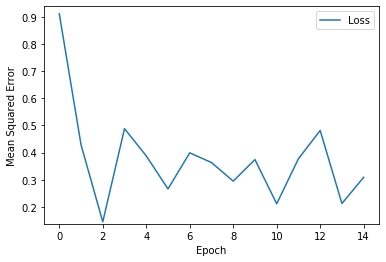


 Evaluate the linear regression model against the test set:
200/200 [==============================] - 1s 7ms/sample - loss: 0.2367 - mean_squared_error: 0.2367


[0.23669921606779099, 0.23669922]

In [175]:
# Train the model on the normalized training set.
epochs, mse = train_model(my_model, train_df, epochs, batch_size, label_name);
plot_the_loss_curve(epochs, mse);

test_features = {name:np.array(value) for name, value in test_df.items()}
test_label = np.array(test_features.pop(label_name)) # isolate the label
print("\n Evaluate the linear regression model against the test set:")
my_model.evaluate(x = test_features, y = test_label, batch_size=batch_size)

#loss, accuracy = model.evaluate(test_ds)
#print("Accuracy", accuracy)


In [469]:
def create_model2(my_learning_rate, my_feature_layer):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add the layer containing the feature columns to the model.
  model.add(my_feature_layer)

  # Describe the topography of the model by calling the tf.keras.layers.Dense
  # method once for each layer. We've specified the following arguments:
  #   * units specifies the number of nodes in this layer.
  #   * activation specifies the activation function (Rectified Linear Unit).
  #   * name is just a string that can be useful when debugging.

  # Define the first hidden layer with 20 nodes.   
  model.add(tf.keras.layers.Dense(units=24, 
                                  activation='relu',                                   
                                  name='Hidden1'))
  
  # Define the second hidden layer with 12 nodes. 
  model.add(tf.keras.layers.Dense(units=12, 
                                  activation='relu',                                   
                                  name='Hidden2'))

  
  # Define the output layer.
  model.add(tf.keras.layers.Dense(units=1,  
                                  name='Output'))                              
  
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError()])

  return model

Train on 933 samples
Epoch 1/60
933/933 [==============================] - 3s 4ms/sample - loss: 0.0983 - mean_squared_error: 0.0983
Epoch 2/60
933/933 [==============================] - 0s 132us/sample - loss: 0.0352 - mean_squared_error: 0.0352
Epoch 3/60
933/933 [==============================] - 0s 185us/sample - loss: 0.0274 - mean_squared_error: 0.0274
Epoch 4/60
933/933 [==============================] - 0s 174us/sample - loss: 0.0239 - mean_squared_error: 0.0239
Epoch 5/60
933/933 [==============================] - 0s 110us/sample - loss: 0.0220 - mean_squared_error: 0.0220
Epoch 6/60
933/933 [==============================] - 0s 115us/sample - loss: 0.0200 - mean_squared_error: 0.0200
Epoch 7/60
933/933 [==============================] - 0s 112us/sample - loss: 0.0198 - mean_squared_error: 0.0198
Epoch 8/60
933/933 [==============================] - 0s 119us/sample - loss: 0.0175 - mean_squared_error: 0.0175
Epoch 9/60
933/933 [==============================] - 0s 119us/sample

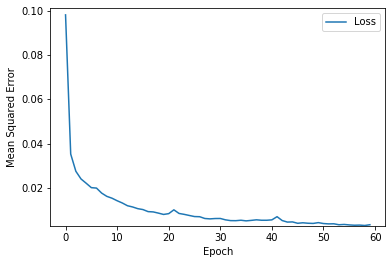


 Evaluate the linear regression model against the test set:
200/200 [==============================] - 2s 8ms/sample - loss: 0.0081 - mean_squared_error: 0.0081


[0.008146455278620124, 0.0081464555]

In [470]:
learning_rate = 0.005
epochs = 60
batch_size = 100
label_name = "Center"

# Establish the model's topography.
my_model = create_model2(learning_rate, my_feature_layer)

# Train the model on the normalized training set.
epochs, mse = train_model(my_model, train_df, epochs, batch_size, label_name);
plot_the_loss_curve(epochs, mse);

test_features = {name:np.array(value) for name, value in test_df.items()}
test_label = np.array(test_features.pop(label_name)) # isolate the label
print("\n Evaluate the linear regression model against the test set:")
my_model.evaluate(x = test_features, y = test_label, batch_size=batch_size)




In [471]:
my_model.summary();

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_features_24 (DenseFeat multiple                  0         
_________________________________________________________________
Hidden1 (Dense)              multiple                  8232      
_________________________________________________________________
Hidden2 (Dense)              multiple                  300       
_________________________________________________________________
Output (Dense)               multiple                  13        
Total params: 8,545
Trainable params: 8,545
Non-trainable params: 0
_________________________________________________________________


In [526]:
save_model(my_model,'savedModel');
my_model.save('my_model.tf');

INFO:tensorflow:Assets written to: savedModel\assets
INFO:tensorflow:Assets written to: my_model.tf\assets


In [519]:
my_model.save_weights('ws.h5')

my_model.save('model.h5')
model_json = my_model.to_json()
with open("model.json", "w") as json_file:
     json_file.write(model_json)


In [185]:
ft = {name:np.array(value) for name, value in train_df.items()}
print(str(len(ft)));

343


In [186]:
print(str(len(train_df)));

933


In [190]:
print ((train_df['Tile0'])[0]);

0.0390777587890625


In [206]:
print(my_model.layers[1])
print(my_model.layers[1].get_weights()[0])
#print(my_model.layers[1].get_weights()[1])
#print(my_model.layers[2].get_weights()[0])


[[-0.01936654 -0.10529993 -0.10228878 ... -0.06938797  0.00058541
  -0.03037427]
 [-0.15197083  0.00077295 -0.17129004 ... -0.15291092 -0.1251194
  -0.00995205]
 [-0.14958458 -0.04119785 -0.0926425  ... -0.01659535 -0.00617061
  -0.01980436]
 ...
 [-0.01948463 -0.10693412 -0.18484314 ... -0.16066006 -0.02883429
  -0.17489201]
 [-0.16721378 -0.14510466  0.05530919 ... -0.05403673 -0.14970125
  -0.12773354]
 [ 0.00364786 -0.09297556 -0.16730575 ... -0.09054723  0.04327306
  -0.07479025]]


In [202]:
print(len(my_model.layers[1].get_weights()[1]));

20


In [227]:
def getInputs():
    total=0;
    inputs = [];
    with open('validation.csv', 'rU') as csvfile:
                csvline = csv.reader(csvfile);
                for row in csvline:
                    if (total<1):                             
                             inputs = row;                             
                    total=total+1;
    return inputs;


In [251]:
inputs = getInputs();


C:\anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 'U' mode is deprecated
  after removing the cwd from sys.path.


In [252]:
print(len(inputs))

342


In [253]:
print(inputs[40]);

9801075


In [254]:
for i in range(0,342):
        inputs[i] = float(float(inputs[i]) / float(TOTAL_COLORS));

In [259]:
print(inputs[40]);

0.5841895937919617


In [309]:
inputsV = [np.array(0) for i in range(0,342)]

n = 342
m = 1
a = [[0] * m for i in range(n)]



In [310]:
print(len(inputsV));
print(inputsV[0])
for i in range(342):
    inputsV[i] = inputs[i];
    
    

342
0


In [317]:
print(inputsV[40])


0.5841895937919617


In [316]:
for i in range(342):
    a[i][0] = inputs[i];


#print(a);

#inputV2 = np.zeros([1,342]);


In [319]:
#pred_y = my_model.predict(inputsV,batch_size=1,verbose=1);

In [320]:
val_df = pd.read_csv('validation.csv');

In [321]:
val_df.head()

,Tile0,Tile1,Tile2,Tile3,Tile4,Tile5,Tile6,Tile7,Tile8,Tile9,...,Tile332,Tile333,Tile334,Tile335,Tile336,Tile337,Tile338,Tile339,Tile340,Tile341
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [323]:
print(val_df['Tile40'][0]);

9801075


In [324]:
val_df = val_df / TOTAL_COLORS;

In [325]:
print(val_df['Tile40'][0]);

0.5841895937919617


In [326]:
def predict(model, dataset, batch_size):  

  # Split the dataset into features and label.  
  features = {name:np.array(value) for name, value in dataset.items()}  
  pred_y = model.predict(x=features, batch_size=batch_size, verbose=1)  

  return pred_y


In [472]:
y_val = predict(my_model,val_df,1)

#print('Yval:' + y_val);

1/1 [==============================] - 2s 2s/sample


In [473]:
print(y_val[0])

[0.76380503]


In [505]:
point = y_val[0] * TOTAL_PIXELS;

pointE1 = point * 0.008146455278620124;

print(point);
print(pointE1);
point = point + pointE1;
print(point);

[41795.41]
[340.48444]
[42135.895]


In [506]:
py = point / TOTAL_WIDTH;
px = point % TOTAL_WIDTH;

print(str(px)+","+str(py));

[87.89453],[146.30519]


In [507]:
trow = py / 10;
tcol = px / 16;
print(str(trow)+","+str(tcol))

[14.630519],[5.493408]


In [508]:
tileP = trow*18 + (tcol);
print(str(tileP))

[268.84274]


In [509]:
print(val_df['Tile254'][0]);

0.12924230098724365


In [510]:
print(val_df['Tile272'][0]*TOTAL_COLORS);

3691141.0


In [511]:
SET_PATH = 'C:/models/ryuboxes/validation/set01';

def genImgCsv(center,file):    
    img = cv2.imread(SET_PATH+'/'+file);
    print('Generating point for' + SET_PATH+'/'+file);
    row=0;
    col=0;
    tileCols = 16;
    tileRows = 10;
    index=0;
    centerX = int(center) % 288;
    centerY = int(center) // 288;
    print(str(centerX)+','+str(centerY));
    
    img.itemset((centerY,centerX,2),255);
    img.itemset((centerY,centerX,1),0);
    img.itemset((centerY,centerX,0),0);
    
    cv2.imwrite('point.png',img)
            
    #print('img: '+file+ ', center: '+ center + 'centerX:' + str(centerX) + ', centerY' + str(centerY));
    

    


In [512]:
genImgCsv(point,'ryu-val1-01.png');

Generating point forC:/models/ryuboxes/validation/set01/ryu-val1-01.png
87,146


In [528]:
print(my_model.get_config());

{'name': 'sequential_48', 'layers': [{'class_name': 'DenseFeatures', 'config': {'name': 'dense_features_24', 'trainable': True, 'dtype': 'float32', 'feature_columns': [{'class_name': 'NumericColumn', 'config': {'key': 'Tile0', 'shape': (1,), 'default_value': None, 'dtype': 'float64', 'normalizer_fn': None}}, {'class_name': 'NumericColumn', 'config': {'key': 'Tile1', 'shape': (1,), 'default_value': None, 'dtype': 'float64', 'normalizer_fn': None}}, {'class_name': 'NumericColumn', 'config': {'key': 'Tile10', 'shape': (1,), 'default_value': None, 'dtype': 'float64', 'normalizer_fn': None}}, {'class_name': 'NumericColumn', 'config': {'key': 'Tile100', 'shape': (1,), 'default_value': None, 'dtype': 'float64', 'normalizer_fn': None}}, {'class_name': 'NumericColumn', 'config': {'key': 'Tile101', 'shape': (1,), 'default_value': None, 'dtype': 'float64', 'normalizer_fn': None}}, {'class_name': 'NumericColumn', 'config': {'key': 'Tile102', 'shape': (1,), 'default_value': None, 'dtype': 'float64'